## **LIBRERÍAS**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

## **DATOS**

In [2]:
data_train = pd.read_csv("p2_data.csv")

In [3]:
data_train

,team,event,avg_score,avg_game_pieces_score,avg_links_points,avg_charge_station,avg_stats,rbt_category
0,8085,ARPKY,39.125000,27.062500,33.125000,29.625000,32.234375,2
1,8085,CMPTX,51.000000,27.000000,30.000000,42.000000,37.500000,1
2,8085,CTHAR,30.000000,17.555556,19.444444,31.000000,24.500000,3
3,8085,CTWAT,24.176471,13.882353,13.823529,28.352941,20.058824,4
4,8085,NECMP1,37.222222,23.166667,26.944444,33.555556,30.222222,2
...,...,...,...,...,...,...,...,...
462,1311,GADAL,8.714286,6.857143,3.928571,14.571429,8.517857,5
463,3019,AZGL,25.666667,12.222222,12.222222,30.333333,20.111111,4
464,5816,FLTA,15.928571,9.714286,5.000000,16.428571,11.767857,5
465,4123,CALA,32.058824,15.352941,15.000000,30.470588,23.220588,3


In [4]:
x = []
y = []

for a,b,c,d,e in zip (data_train["rbt_category"],
 data_train["avg_score"],
 data_train["avg_game_pieces_score"],
 data_train["avg_links_points"],
 data_train["avg_charge_station"]):
    x.append([b,c,d,e])
    y.append(a)
    
    
x = np.array(x)
y = np.array(y)

In [5]:
print(x.shape)
print(y.shape)

(467, 4)
(467,)


In [6]:
y2 = []

for i in y:
  create_cat = np.zeros(6, dtype=int)
  cat = create_cat.tolist()
  cat[i-1] = 1
  y2.append(cat)

y2 = np.array(y2)
y2

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [7]:
lim=int(len(x)*0.20)

x_train = x[lim:]
y2_train = y2[lim:]

x_test = x[:lim]
y2_test = y2[:lim]

In [8]:
print(x_train.shape)
print(y2_train.shape)

(374, 4)
(374, 6)


In [9]:
print(x_test.shape)
print(y2_test.shape)

(93, 4)
(93, 6)


## **MODELO**

In [10]:
model_FRC = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(4,), activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(36, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),
])

In [11]:
model_FRC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 6)                 18        
                                                                 
 dense_2 (Dense)             (None, 12)                84        
                                                                 
 dense_3 (Dense)             (None, 36)                468       
                                                                 
 dense_4 (Dense)             (None, 6)                 222       
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_FRC.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [13]:
histor_frc = model_FRC.fit(
    x_train,
    y2_train,
    epochs=500,
    batch_size=16,
    validation_data=(x_test, y2_test)
)

Epoch 1/500
24/24 [==============================] - 7s 13ms/step - loss: 2.2431 - accuracy: 0.2139 - val_loss: 3.1646 - val_accuracy: 0.3978
Epoch 2/500
24/24 [==============================] - 0s 6ms/step - loss: 1.6416 - accuracy: 0.5642 - val_loss: 2.5701 - val_accuracy: 0.3226
Epoch 3/500
24/24 [==============================] - 0s 5ms/step - loss: 1.3707 - accuracy: 0.5588 - val_loss: 2.0351 - val_accuracy: 0.4086
Epoch 4/500
24/24 [==============================] - 0s 5ms/step - loss: 1.1579 - accuracy: 0.6524 - val_loss: 1.5142 - val_accuracy: 0.5054
Epoch 5/500
24/24 [==============================] - 0s 6ms/step - loss: 1.0113 - accuracy: 0.6684 - val_loss: 1.2941 - val_accuracy: 0.4946
Epoch 6/500
24/24 [==============================] - 0s 6ms/step - loss: 0.9163 - accuracy: 0.6738 - val_loss: 1.1422 - val_accuracy: 0.5376
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 0.8343 - accuracy: 0.6898 - val_loss: 1.1181 - val_accuracy: 0.5161
Epoch 8/500


In [14]:
def plot_metrics(metr, val_metr, type_metr):
  plt.figure(figsize=(20,5))

  loss_l=metr
  val_loss_l=val_metr
  if type_metr==0:
    mensaj="pérdida"
    plt.title(round(min(val_loss_l),3))
  else:
    mensaj="aciertos"
    plt.title(round(max(val_loss_l),3))
  plt.plot(loss_l)
  plt.plot(val_loss_l)
  plt.xlabel("# Epoca")
  plt.ylabel("Magnitud de "+ mensaj)
  plt.grid()
  plt.show()
  print()

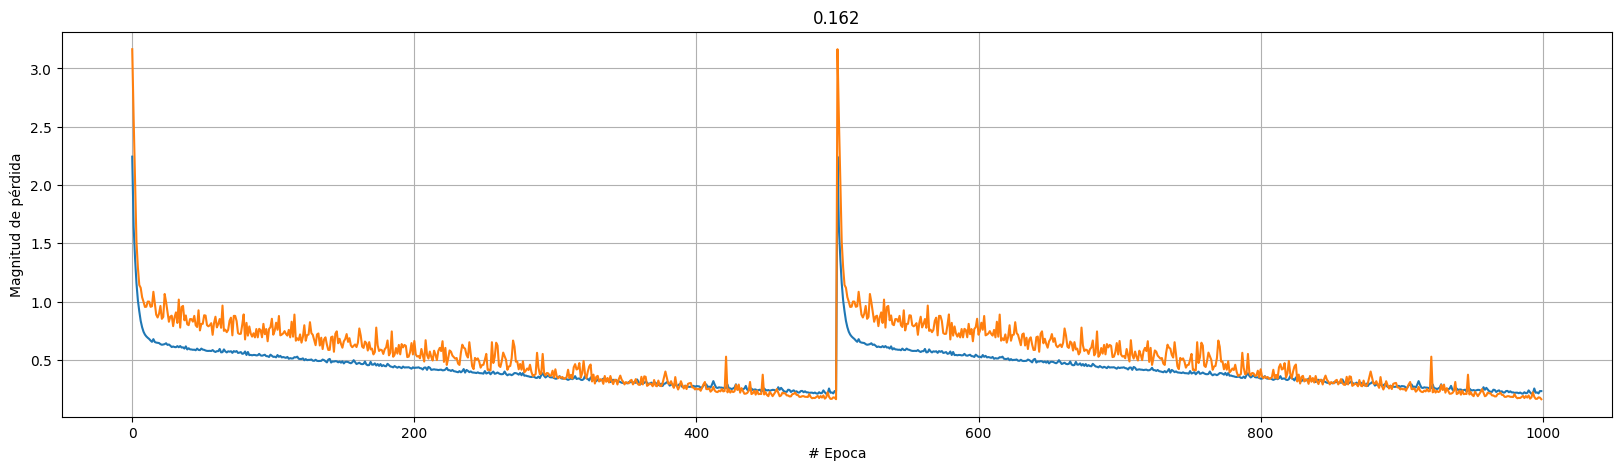

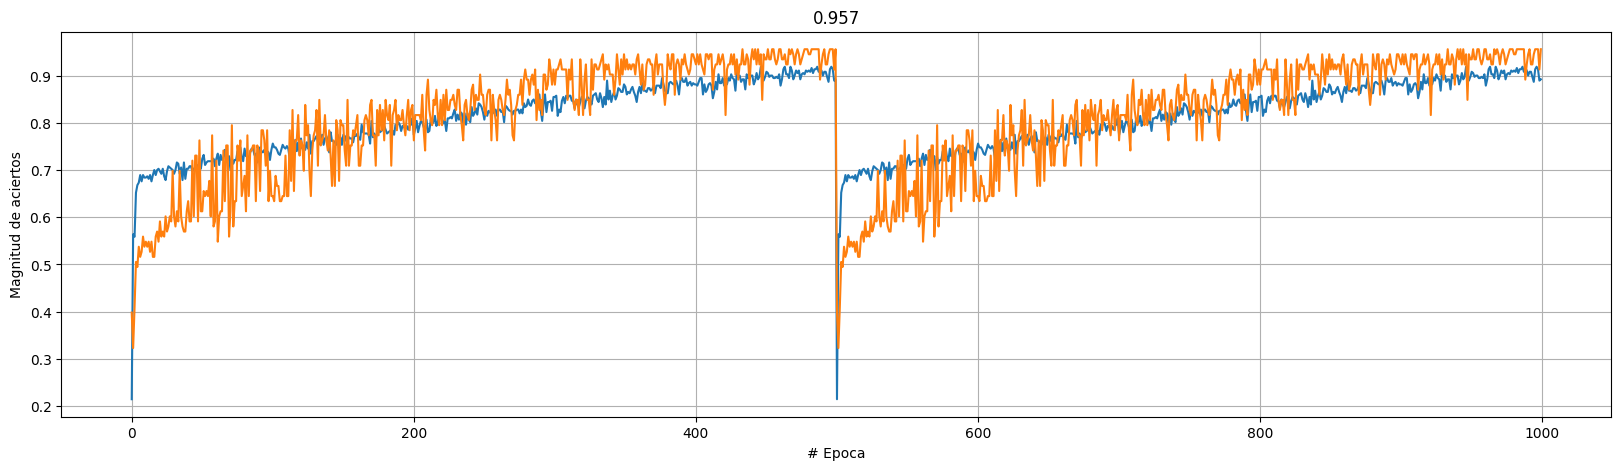

In [15]:
loss_acum=histor_frc.history["loss"]+histor_frc.history["loss"]
val_loss_acum=histor_frc.history["val_loss"]+histor_frc.history["val_loss"]
plot_metrics(loss_acum, val_loss_acum, 0)

accuracy_acum=histor_frc.history["accuracy"]+histor_frc.history["accuracy"]
val_accuracy_acum=histor_frc.history["val_accuracy"]+histor_frc.history["val_accuracy"]
plot_metrics(accuracy_acum, val_accuracy_acum, 1)

In [16]:
mad_town_stats_predict = model_FRC.predict(np.array([[48.8,31.8,43,40]]))

1/1 [==============================] - 0s 87ms/step


In [17]:
category = np.argmax(mad_town_stats_predict[0])
assign_category = category+1 
assign_category

1

In [18]:
tecbot_stats_predict = model_FRC.predict(np.array([[14.66666,11,9,19.3333]]))

1/1 [==============================] - 0s 18ms/step


In [19]:
category = np.argmax(tecbot_stats_predict[0])
assign_category = category+1 
assign_category

5

In [24]:
num_rows = data_train.shape[0]
random_index = random.randint(0, num_rows - 1)
random_row = data_train.iloc[random_index]
random_row

team                          2075
event                       MICMP1
avg_score                39.133333
avg_game_pieces_score    24.333333
avg_links_points              30.0
avg_charge_station       29.866667
avg_stats                30.833333
rbt_category                     2
Name: 89, dtype: object

In [25]:
team_stats = [list(random_row[["avg_score","avg_game_pieces_score","avg_links_points","avg_charge_station"]])]
team_predict = model_FRC.predict(np.array(team_stats))

1/1 [==============================] - 0s 18ms/step


In [26]:
category = np.argmax(team_predict[0])
assign_category = category+1 
assign_category

2

In [27]:
control = pd.read_csv("data.csv")

In [28]:
control

,team,event,avg_score,avg_game_pieces_score,avg_links_points,avg_charge_station
0,3473,CALA,23.538462,14.384615,12.692308,24.923077
1,3473,CAPH,23.266667,11.533333,8.666667,27.466667
2,3473,CASD,24.272727,15.272727,15.909091,25.272727


In [29]:
num_rows = control.shape[0]
random_index = random.randint(0, num_rows - 1)
random_row = control.iloc[random_index]
random_row

team                          3473
event                         CAPH
avg_score                23.266667
avg_game_pieces_score    11.533333
avg_links_points          8.666667
avg_charge_station       27.466667
Name: 1, dtype: object

In [30]:
team_stats = [list(random_row[["avg_score","avg_game_pieces_score","avg_links_points","avg_charge_station"]])]
team_predict = model_FRC.predict(np.array(team_stats))

1/1 [==============================] - 0s 20ms/step


In [31]:
category = np.argmax(team_predict[0])
assign_category = category+1 
assign_category

4